# Credit Card Fraud Detection - Complete EDA
## Task 1: EDA and Preprocessing for CreditCard Dataset

This notebook analyzes the creditcard.csv dataset with:
- Comprehensive EDA
- Missing value analysis
- Feature scaling
- Class imbalance handling

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('Libraries imported successfully!')

Libraries imported successfully!


## 1. Data Loading

In [2]:
# Load data
DATA_PATH = '../data/raw/creditcard.csv'
df = pd.read_csv(DATA_PATH)

print(f'✓ Data loaded successfully!')
print(f'Shape: {df.shape}')
print(f'\nFirst few rows:')
df.head()

✓ Data loaded successfully!
Shape: (284807, 31)

First few rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Data Cleaning
### 2.1 Missing Values

In [3]:
# Check for missing values
print('Missing Values Analysis:')
print('='*50)
missing = df.isnull().sum()
print(missing[missing > 0])

if missing.sum() == 0:
    print('\n✓ No missing values found!')
else:
 print(f'\n⚠ Total missing: {missing.sum()}')

# Data types
print('\nData Types:')
print(df.dtypes.value_counts())

# Basic statistics
print('\nBasic Info:')
print(df.info())

Missing Values Analysis:
Series([], dtype: int64)

✓ No missing values found!

Data Types:
float64    30
int64       1
Name: count, dtype: int64

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17 

### 2.2 Remove Duplicates

In [4]:
# Check and remove duplicates
initial_rows = len(df)
df.drop_duplicates(inplace=True)
duplicates_removed = initial_rows - len(df)

print(f'Duplicates removed: {duplicates_removed}')
print(f'Final shape: {df.shape}')

Duplicates removed: 1081
Final shape: (283726, 31)


## 3. Exploratory Data Analysis
### 3.1 Class Distribution

Class Distribution:
Normal (0): 283,253 (99.8333%)
Fraud (1): 473 (0.1667%)

⚠ Imbalance Ratio: 599:1
This is a HIGHLY imbalanced dataset!


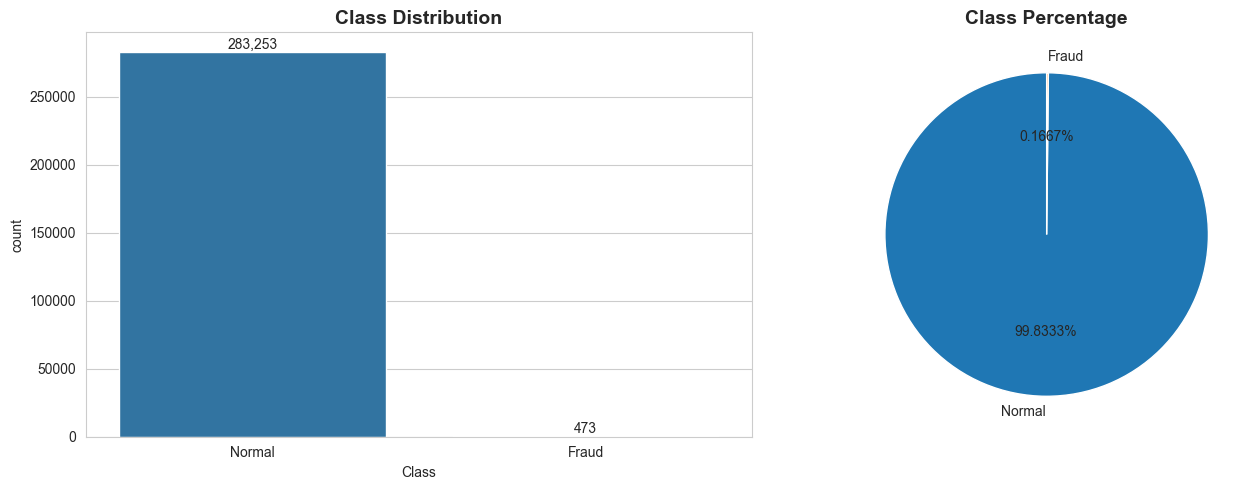

In [5]:
# Class distribution
class_dist = df['Class'].value_counts()
class_pct = df['Class'].value_counts(normalize=True) * 100

print('Class Distribution:')
print('='*50)
print(f'Normal (0): {class_dist[0]:,} ({class_pct[0]:.4f}%)')
print(f'Fraud (1): {class_dist[1]:,} ({class_pct[1]:.4f}%)')
print(f'\n⚠ Imbalance Ratio: {class_dist[0]/class_dist[1]:.0f}:1')
print('This is a HIGHLY imbalanced dataset!')

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='Class', ax=ax1)
ax1.set_title('Class Distribution', fontsize=14, fontweight='bold')
ax1.set_xticklabels(['Normal', 'Fraud'])
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

# Pie chart (log scale for visibility)
ax2.pie(class_dist, labels=['Normal', 'Fraud'], autopct='%1.4f%%', startangle=90)
ax2.set_title('Class Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 3.2 Time and Amount Analysis

Time and Amount Statistics:

Time (seconds from first transaction):
count    283726.000000
mean      94811.077600
std       47481.047891
min           0.000000
25%       54204.750000
50%       84692.500000
75%      139298.000000
max      172792.000000
Name: Time, dtype: float64

Amount:
count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64


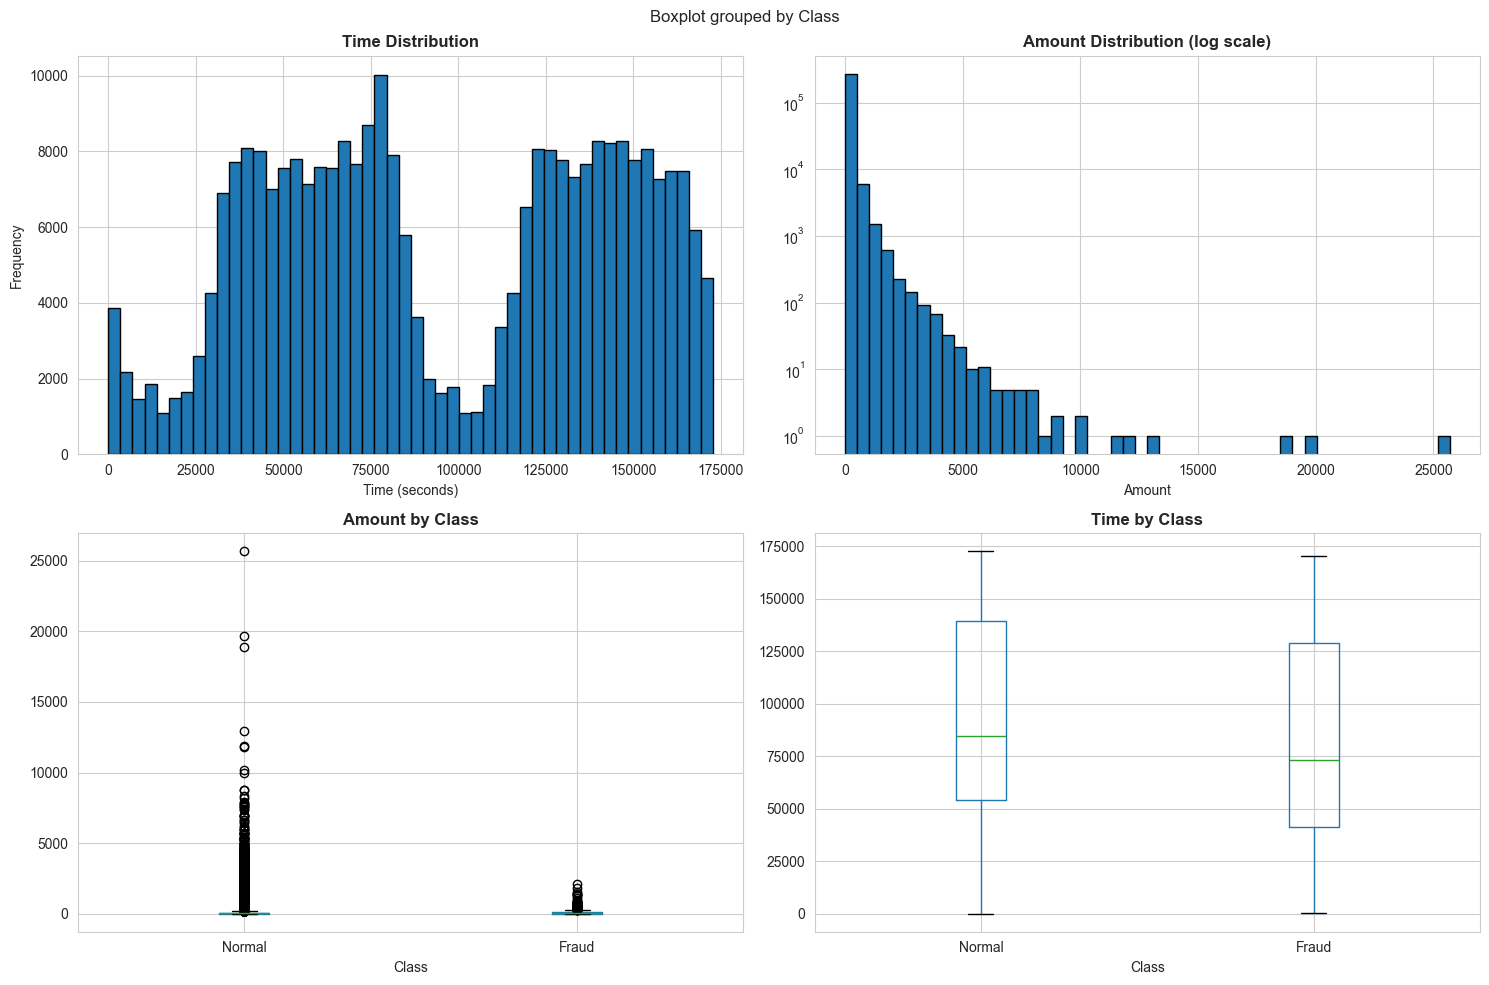

In [6]:
# Time and Amount statistics
print('Time and Amount Statistics:')
print('='*50)
print('\nTime (seconds from first transaction):')
print(df['Time'].describe())
print('\nAmount:')
print(df['Amount'].describe())

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Time distribution
axes[0, 0].hist(df['Time'], bins=50, edgecolor='black')
axes[0, 0].set_title('Time Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Time (seconds)')
axes[0, 0].set_ylabel('Frequency')

# Amount distribution (log scale)
axes[0, 1].hist(df[df['Amount'] > 0]['Amount'], bins=50, edgecolor='black')
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('Amount Distribution (log scale)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Amount')

# Amount by class
df.boxplot(column='Amount', by='Class', ax=axes[1, 0])
axes[1, 0].set_title('Amount by Class', fontsize=12, fontweight='bold')
axes[1, 0].set_xticklabels(['Normal', 'Fraud'])

# Time by class
df.boxplot(column='Time', by='Class', ax=axes[1, 1])
axes[1, 1].set_title('Time by Class', fontsize=12, fontweight='bold')
axes[1, 1].set_xticklabels(['Normal', 'Fraud'])

plt.tight_layout()
plt.show()

### 3.3 PCA Feature Analysis

Note: V1-V28 are PCA-transformed features for confidentiality

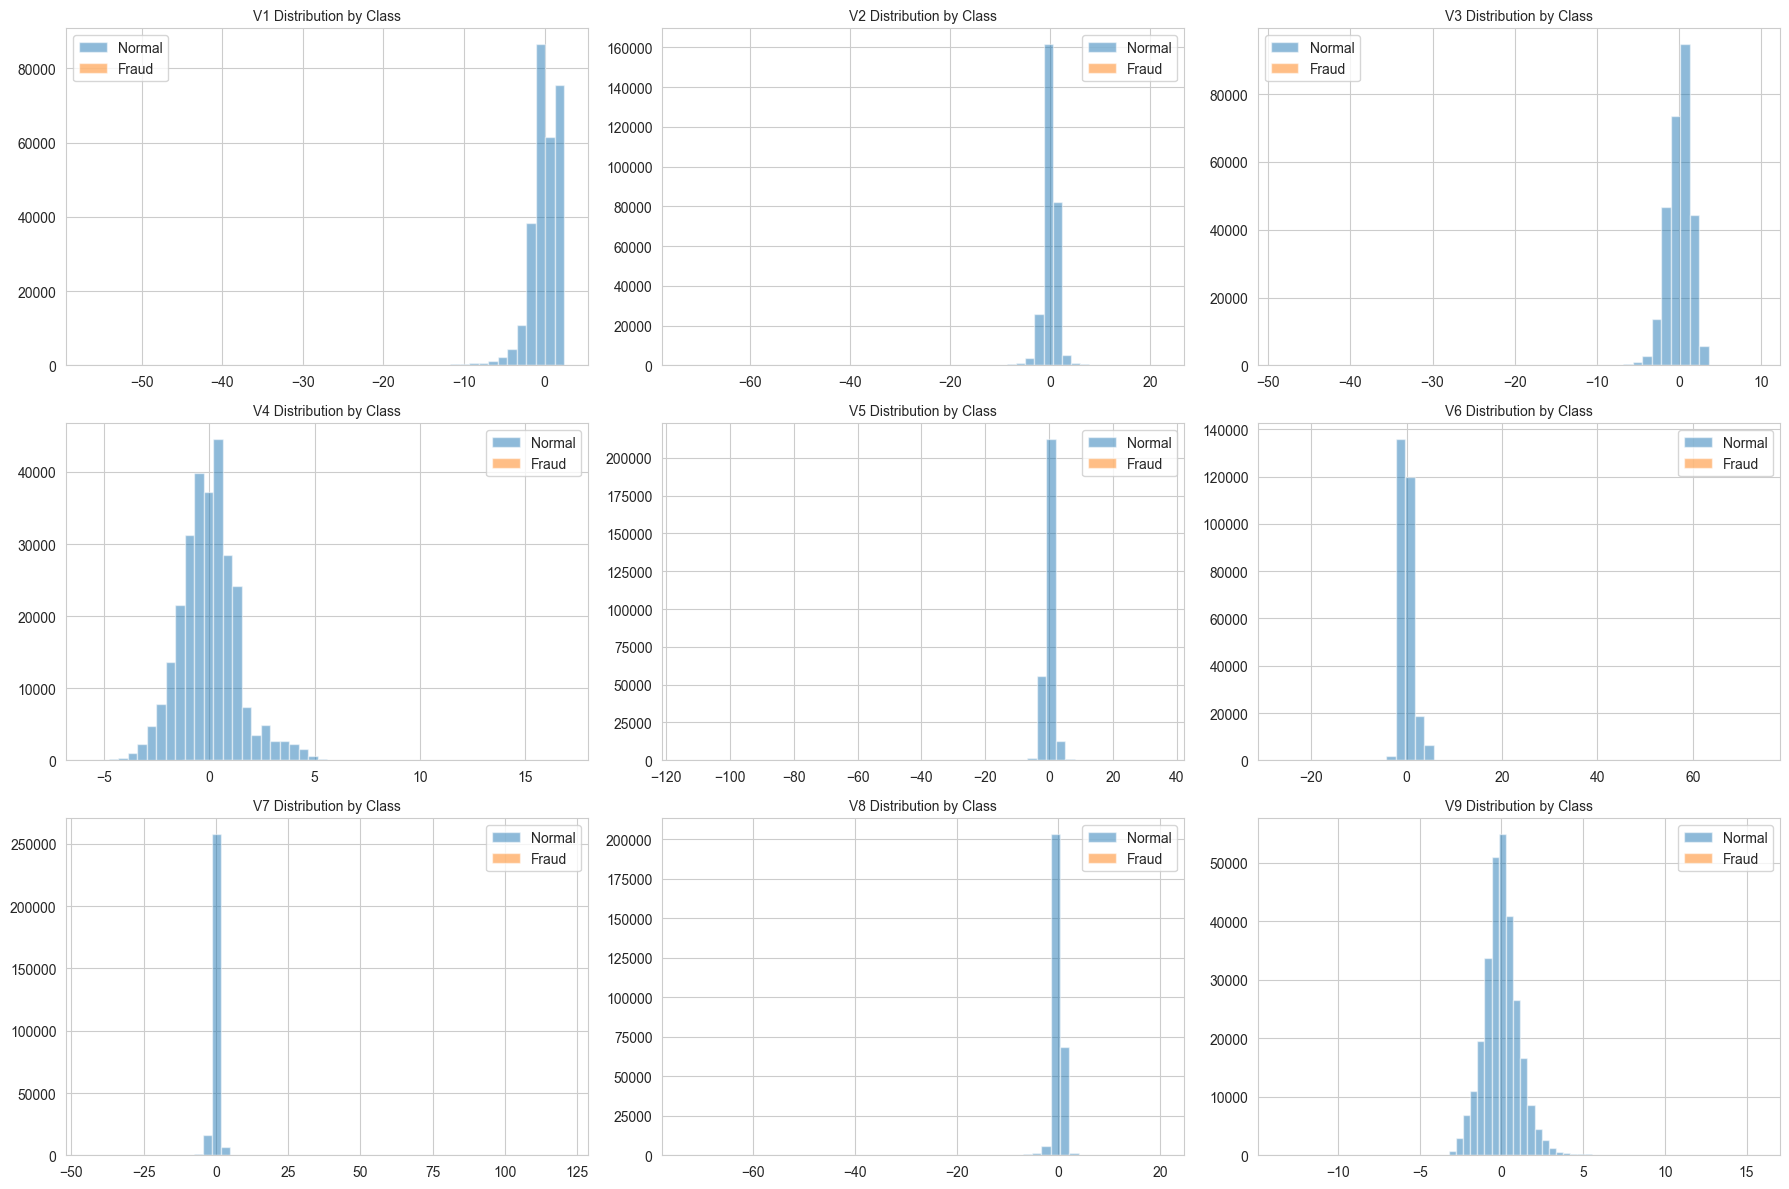


Observation: Some PCA features show clear separation between fraud and normal transactions


In [7]:
# Analyze PCA features
v_features = [f'V{i}' for i in range(1, 29)]

# Show a subset of V features distributions
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, feature in enumerate(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']):
    # Plot distribution by class
    df[df['Class'] == 0][feature].hist(bins=50, alpha=0.5, label='Normal', ax=axes[idx])
    df[df['Class'] == 1][feature].hist(bins=50, alpha=0.5, label='Fraud', ax=axes[idx])
    axes[idx].set_title(f'{feature} Distribution by Class', fontsize=10)
    axes[idx].legend()

plt.tight_layout()
plt.show()

print('\nObservation: Some PCA features show clear separation between fraud and normal transactions')

### 3.4 Correlation Analysis

Top 10 features correlated with fraud:
Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
Name: Class, dtype: float64

Bottom 10 features (negative correlation):
V9    -0.094021
V1    -0.094486
V18   -0.105340
V7    -0.172347
V3    -0.182322
V16   -0.187186
V10   -0.206971
V12   -0.250711
V14   -0.293375
V17   -0.313498
Name: Class, dtype: float64


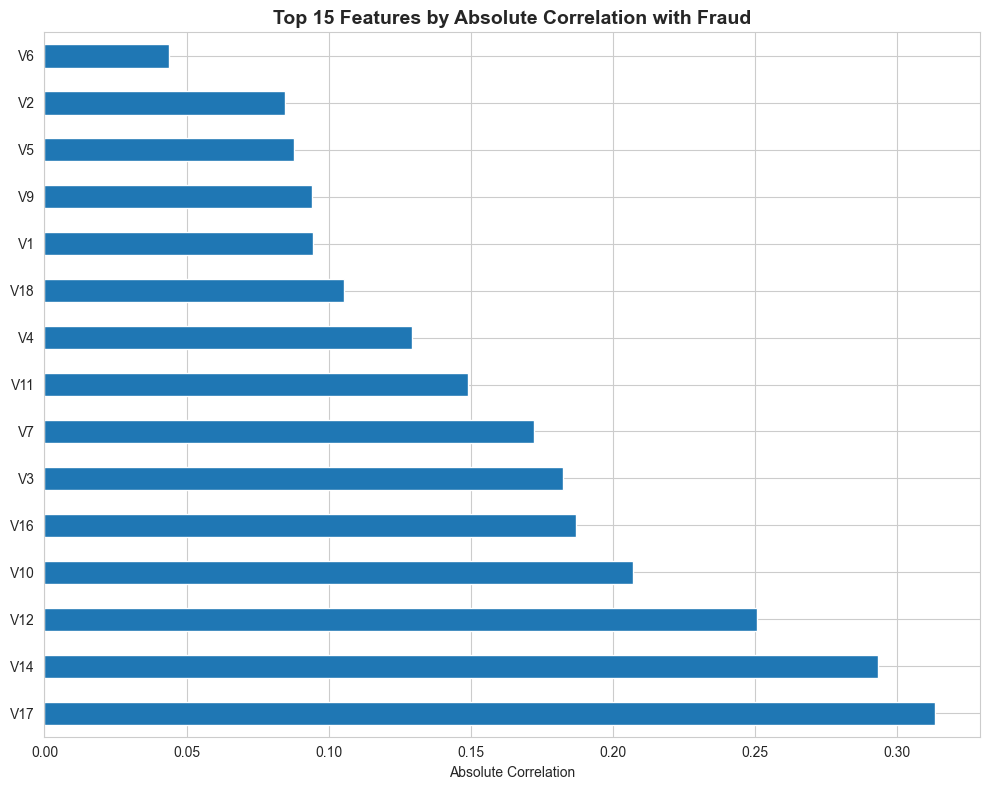

In [8]:
# Correlation with target
correlations = df.corr()['Class'].sort_values(ascending=False)
print('Top 10 features correlated with fraud:')
print(correlations.head(11))  # 11 to include Class itself

print('\nBottom 10 features (negative correlation):')
print(correlations.tail(10))

# Visualize top correlations
fig, ax = plt.subplots(figsize=(10, 8))
top_features = correlations.abs().sort_values(ascending=False)[1:16]  # Top 15 excluding Class
top_features.plot(kind='barh', ax=ax)
ax.set_title('Top 15 Features by Absolute Correlation with Fraud', fontsize=14, fontweight='bold')
ax.set_xlabel('Absolute Correlation')
plt.tight_layout()
plt.show()

## 4. Feature Scaling

In [9]:
# Scale Time and Amount using RobustScaler (less sensitive to outliers)
print('Scaling Amount and Time features...')

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop original features
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Reorder columns
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

print('✓ Features scaled successfully!')
print(f'New shape: {df.shape}')
print('\nFirst few rows after scaling:')
df.head()

Scaling Amount and Time features...
✓ Features scaled successfully!
New shape: (283726, 31)

First few rows after scaling:


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.774718,-0.995290,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.268530,-0.995290,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.959811,-0.995279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.411487,-0.995279,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.667362,-0.995267,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## 5. Final Dataset Overview

In [10]:
# Final summary
print('FINAL DATASET SUMMARY')
print('='*50)
print(f'Total transactions: {len(df):,}')
print(f'Total features: {df.shape[1]}')
print(f'\nClass Distribution:')
print(df['Class'].value_counts())
print(f'\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB')

print('\n✓ Dataset ready for modeling!')
print('\nNote: This dataset is PCA-transformed and highly imbalanced.')
print('SMOTE or other resampling techniques recommended before training.')

FINAL DATASET SUMMARY
Total transactions: 283,726
Total features: 31

Class Distribution:
Class
0    283253
1       473
Name: count, dtype: int64

Memory usage: 69.27 MB

✓ Dataset ready for modeling!

Note: This dataset is PCA-transformed and highly imbalanced.
SMOTE or other resampling techniques recommended before training.


## 6. Save Processed Data

In [11]:
# Save processed data
import os
PROCESSED_DIR = '../data/processed'
os.makedirs(PROCESSED_DIR, exist_ok=True)

df.to_csv(f'{PROCESSED_DIR}/creditcard_processed.csv', index=False)
print(f'✓ Processed data saved to: {PROCESSED_DIR}/creditcard_processed.csv')

✓ Processed data saved to: ../data/processed/creditcard_processed.csv


## Summary

### CreditCard Dataset Analysis Complete:

✅ **Data Cleaning**
- No missing values
- Duplicates removed
- Data types verified

✅ **EDA Completed**
- Extreme class imbalance identified (99.83% vs 0.17%)
- PCA features analyzed
- Correlation with fraud identified
-Time and Amount patterns explored

✅ **Feature Engineering**
- RobustScaler applied to Time and Amount
- Features ready for modeling

### Key Findings:
1. **Severe Class Imbalance**: Only 0.17% fraud - requires SMOTE/resampling
2. **PCA Features**: Already dimensionality-reduced for privacy
3. **Important Features**: V17, V14, V12, V10 show strong correlation with fraud
4. **Amount**: Fraud transactions tend to have different amount patterns

### Next Steps:
- Apply SMOTE before training
- Train classification models
- Focus on Recall and F1-score metrics